# YOLO com Ultralytics

Neste notebook, exploraremos técnicas avançadas do YOLO utilizando a biblioteca Ultralytics, incluindo:

1. Fine-tuning de modelos pré-treinados
2. Treinamento com datasets personalizados
3. Técnicas de aumento de dados
4. Tarefas múltiplas (detecção, segmentação e classificação)
5. Otimização de modelos para produção
6. Tracking de objetos em vídeos

In [ ]:
# # Instalação dos pacotes necessários
# !pip install ultralytics
# !pip install opencv-python matplotlib

In [ ]:
# Importação das bibliotecas
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display, Image

## 1. Explorando diferentes modelos e tarefas

YOLO v8 suporta múltiplas tarefas além da detecção de objetos:

In [2]:
# Carregar um modelo para detecção de objetos (padrão)
detect_model = YOLO('model/yolov8n.pt')

# Carregar um modelo para segmentação de instâncias
segment_model = YOLO('model/yolov8n-seg.pt')

# Carregar um modelo para classificação de imagens
classify_model = YOLO('model/yolov8n-cls.pt')

# Carregar um modelo para pose estimation
pose_model = YOLO('model/yolov8n-pose.pt')

## Comparação de diferentes tarefas em uma mesma imagem

In [9]:
# Função para mostrar imagens lado a lado
def compare_tasks(image_path):
    # Detecção
    detect_results = detect_model(image_path)
    detect_img = detect_results[0].plot()
    
    # classificação
    classify_results = classify_model(image_path)
    classify_img = classify_results[0].plot()
    if classify_results[0].boxes:
        class_name = classify_results[0].names[classify_results[0].boxes.cls[0]]
        cv2.putText(detect_img, f"Class: {class_name}", (50, 50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    else:
        cv2.putText(detect_img, "Nenhuma classe detectada", (50, 50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Segmentação
    segment_results = segment_model(image_path)
    segment_img = segment_results[0].plot()
    
    # Pose (pode não funcionar em todas as imagens)
    try:
        pose_results = pose_model(image_path)
        pose_img = pose_results[0].plot()
    except:
        pose_img = np.zeros_like(detect_img)
        cv2.putText(pose_img, "Pose não detectada", (50, 100), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Exibir imagens
    plt.figure(figsize=(18, 8))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB))
    plt.title("Detecção de Objetos")
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(segment_img, cv2.COLOR_BGR2RGB))
    plt.title("Segmentação de Instâncias")
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(pose_img, cv2.COLOR_BGR2RGB))
    plt.title("Estimativa de Pose")
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(classify_img, cv2.COLOR_BGR2RGB))
    plt.title("Classificação de Imagem")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


image 1/1 /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 156.9ms
Speed: 3.1ms preprocess, 156.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/bus.jpg: 224x224 minibus 0.50, police_van 0.29, trolleybus 0.05, golfcart 0.02, jinrikisha 0.02, 9.0ms
Speed: 6.2ms preprocess, 9.0ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 90.4ms
Speed: 2.0ms preprocess, 90.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/bus.jpg: 640x480 4 persons, 64.2ms
Speed: 2.1ms preprocess, 64.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


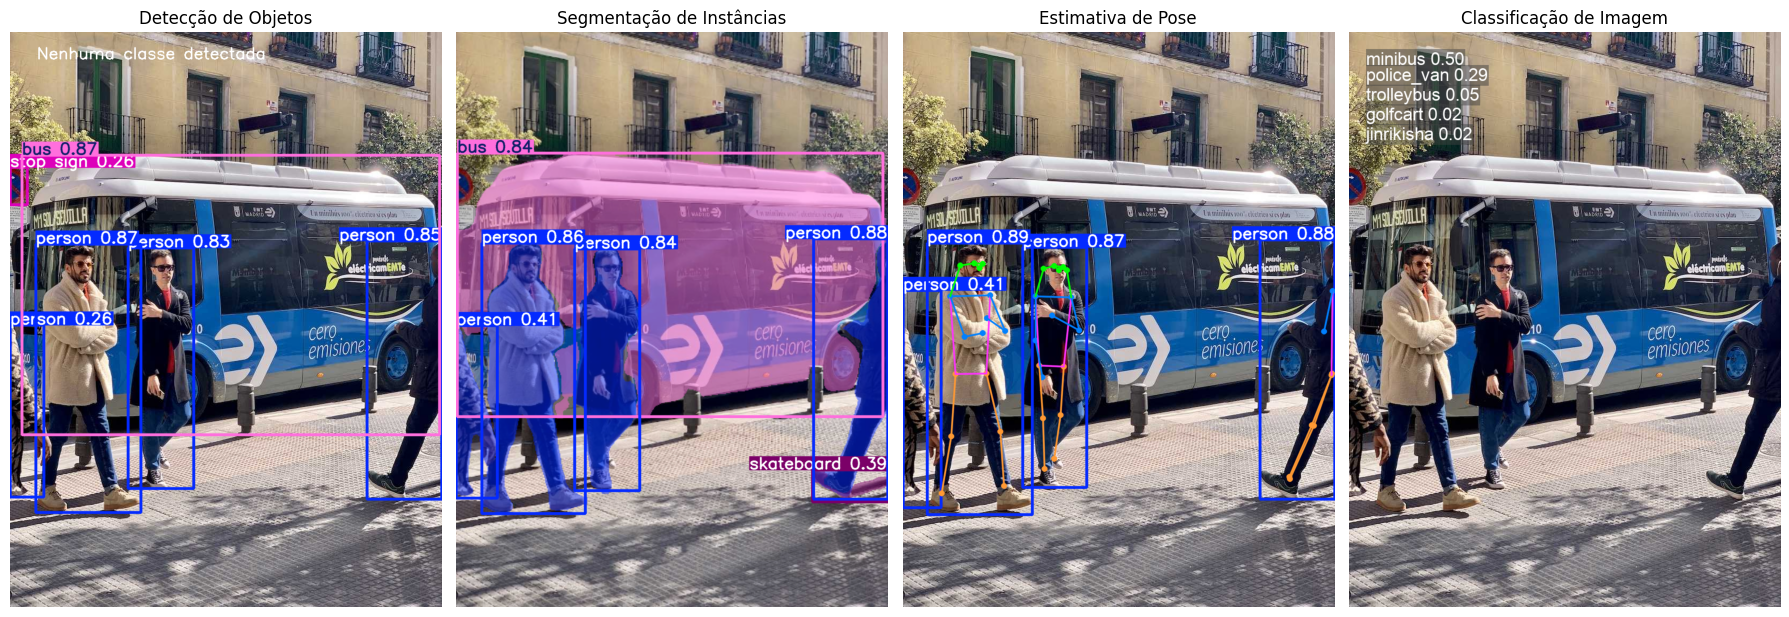

In [10]:
# Comparar diferentes tarefas em uma imagem de pessoas
compare_tasks('lab_images/bus.jpg')

## 9. Tracking de objetos em vídeos

O YOLO também pode ser utilizado para tracking de objetos em vídeos.

In [ ]:
# Baixar um vídeo de exemplo
!wget https://ultralytics.com/assets/people_walking.mp4 -O test_video.mp4

In [14]:
# Fine-tuning de um modelo pré-treinado
model = YOLO('model/yolov8n.pt')  # carregamos um modelo pequeno para o exemplo

# Tracking de objetos no vídeo
track_results = model.track(
    'lab_images/people-walking.mp4',
    conf=0.3,
    iou=0.5,
    show=False,
    tracker="bytetrack.yaml",  # Algoritmo de tracking
    classes=0,  # Apenas pessoas (classe 0)
    save=True
)

print("Tracking completo! Vídeo salvo em runs/detect/track/")

100%|██████████| 6.25M/6.25M [00:01<00:00, 6.35MB/s]


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



video 1/1 (frame 1/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 2 persons, 63.4ms
video 1/1 (frame 2/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 2 persons, 60.3ms
video 1/1 (frame 3/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 2 persons, 47.4ms
video 1/1 (frame 4/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 2 persons, 49.2ms
video 1/1 (frame 5/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 2 persons, 71.2ms
video 1/1 (frame 6/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 2 persons, 76.9ms
video 1/1 (frame 7/510) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/people-walking.mp4: 384x640 1 person, 66.5ms
video 1/1 (frame 8/510) /Users/arnaldoalve